In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id = "division_id"></a>

- [Subreddit posts dataframe No 2](#df2_id)
- [Concatenate the dataframes](#concat_id)
- [Modeling the Data](#model_id)




# 1. Creation of 49ers dataframe from Reddit

In [2]:
params = {'subreddit': '49ers',
         "size" : 2000,                       #request 1000 submissions from subreddit
         }

In [3]:
#base_url = 'https://api.pushshift.io/reddit/search/comment/?'
base_url = 'https://api.pushshift.io/reddit/search/submission/?'

In [4]:
res = requests.get(base_url, params)
res

<Response [200]>

In [64]:
json_res = res.json()
#json_res

In [6]:
if res.status_code != 200:
    print(f'Error Code: {res.status_code}')
else:
    df = pd.DataFrame(res.json()['data'])

In [7]:
pd.set_option('display.max_columns', None)

df.head(1)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,url,whitelist_status,wls,author_flair_background_color,media,media_embed,post_hint,preview,secure_media,secure_media_embed,thumbnail_height,thumbnail_width,crosspost_parent,crosspost_parent_list,removed_by_category,media_metadata,link_flair_template_id,link_flair_text,banned_by,link_flair_css_class,author_cakeday,gilded
0,[],False,10thletteroftheaphbt,49ers,"[{'a': ':49ers:', 'e': 'emoji', 'u': 'https://...",837aa58a-faae-11e0-b638-12313d096aae,:49ers:,dark,richtext,t2_45gqh8ju,False,False,[],False,False,1580455242,self.49ers,https://www.reddit.com/r/49ers/comments/ewkqdk...,{},ewkqdk,True,False,False,False,True,True,False,,[],dark,text,False,False,True,3,0,False,all_ads,/r/49ers/comments/ewkqdk/i_wonder_what_our_tea...,False,6,1580455243,1,,True,False,False,49ers,t5_2rebv,106094,public,self,I wonder what our team would be called if that...,0,https://www.reddit.com/r/49ers/comments/ewkqdk...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df[['title','selftext']].head()

,title,selftext
0,I wonder what our team would be called if that...,
1,"Not sure if this is the right place to ask, bu...","My first grade teacher, Steve Perry (no this i..."
2,Very Informative Breakdown of Our D Line's Stu...,
3,"3 Days till the big one, fam. How you're holdi...","Personally, since it was a week were life got ..."
4,When you realize which team Iron Man is cheeri...,


In [9]:
df['title'].isnull().sum()

0

In [10]:
df['selftext'].isnull().sum()

1

In [11]:
df['comments'] = df['title'] + df['selftext']
df.head(1)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,url,whitelist_status,wls,author_flair_background_color,media,media_embed,post_hint,preview,secure_media,secure_media_embed,thumbnail_height,thumbnail_width,crosspost_parent,crosspost_parent_list,removed_by_category,media_metadata,link_flair_template_id,link_flair_text,banned_by,link_flair_css_class,author_cakeday,gilded,comments
0,[],False,10thletteroftheaphbt,49ers,"[{'a': ':49ers:', 'e': 'emoji', 'u': 'https://...",837aa58a-faae-11e0-b638-12313d096aae,:49ers:,dark,richtext,t2_45gqh8ju,False,False,[],False,False,1580455242,self.49ers,https://www.reddit.com/r/49ers/comments/ewkqdk...,{},ewkqdk,True,False,False,False,True,True,False,,[],dark,text,False,False,True,3,0,False,all_ads,/r/49ers/comments/ewkqdk/i_wonder_what_our_tea...,False,6,1580455243,1,,True,False,False,49ers,t5_2rebv,106094,public,self,I wonder what our team would be called if that...,0,https://www.reddit.com/r/49ers/comments/ewkqdk...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I wonder what our team would be called if that...


In [12]:
df1 = df[['comments']]

In [13]:
df1['label']=1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df1.head()

,comments,label
0,I wonder what our team would be called if that...,1
1,"Not sure if this is the right place to ask, bu...",1
2,Very Informative Breakdown of Our D Line's Stu...,1
3,"3 Days till the big one, fam. How you're holdi...",1
4,When you realize which team Iron Man is cheeri...,1


In [15]:
df1.to_csv('./datasets/df1.csv',index = False)

<a id = "df2_id"></a>

- [Top](#division_id)

# 2. Creation of NFL dataframe from Reddit

In [16]:
params = {'subreddit': 'nfl',
          'size' : 1000,
         }

In [17]:
#base_url = 'https://api.pushshift.io/reddit/search/comment/?'
base_url = 'https://api.pushshift.io/reddit/search/submission/?'

In [18]:
res = requests.get(base_url, params)
res

<Response [200]>

In [19]:
json_res = res.json()
#json_res

In [20]:
if res.status_code != 200:
    print(f'Error Code: {res.status_code}')
else:
    df = pd.DataFrame(res.json()['data'])

In [21]:
pd.set_option('display.max_columns', None)

df.head(1)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,url,whitelist_status,wls,post_hint,preview,thumbnail_height,thumbnail_width,author_flair_template_id,author_flair_text_color,removed_by_category,author_flair_background_color,media,media_embed,secure_media,secure_media_embed,crosspost_parent,crosspost_parent_list,link_flair_css_class,link_flair_text,media_metadata,banned_by,edited,author_cakeday,suggested_sort,poll_data
0,[],False,Billy_Bob_Jim_12,None,[],None,text,t2_12fziw,False,False,[],False,False,1580457330,self.nfl,https://www.reddit.com/r/nfl/comments/ewl2qr/a...,{},ewl2qr,True,False,False,False,True,True,False,,[],dark,text,False,False,True,1,0,False,all_ads,/r/nfl/comments/ewl2qr/any_uk_fans_do_you_reco...,False,6,1580457331,1,,True,False,False,nfl,t5_2qmg3,1824845,public,self,"Any UK fans, do you recommend watching the gam...",0,https://www.reddit.com/r/nfl/comments/ewl2qr/a...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df[['title','selftext']].isnull().sum()

title       0
selftext    6
dtype: int64

In [23]:
df['comments'] = df['title'] + df['selftext']

In [24]:
df.head(1)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,url,whitelist_status,wls,post_hint,preview,thumbnail_height,thumbnail_width,author_flair_template_id,author_flair_text_color,removed_by_category,author_flair_background_color,media,media_embed,secure_media,secure_media_embed,crosspost_parent,crosspost_parent_list,link_flair_css_class,link_flair_text,media_metadata,banned_by,edited,author_cakeday,suggested_sort,poll_data,comments
0,[],False,Billy_Bob_Jim_12,None,[],None,text,t2_12fziw,False,False,[],False,False,1580457330,self.nfl,https://www.reddit.com/r/nfl/comments/ewl2qr/a...,{},ewl2qr,True,False,False,False,True,True,False,,[],dark,text,False,False,True,1,0,False,all_ads,/r/nfl/comments/ewl2qr/any_uk_fans_do_you_reco...,False,6,1580457331,1,,True,False,False,nfl,t5_2qmg3,1824845,public,self,"Any UK fans, do you recommend watching the gam...",0,https://www.reddit.com/r/nfl/comments/ewl2qr/a...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Any UK fans, do you recommend watching the gam..."


In [25]:
df2 = df[['comments']]

In [26]:
df2['label']=0

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df2.head()

,comments,label
0,"Any UK fans, do you recommend watching the gam...",0
1,😂,0
2,Does anyone else watch the Super Bowl alone? I...,0
3,"On this day in 1988, the Washington Redskins, ...",0
4,Is Nick Foles the greatest qb in Eagles history,0


In [28]:
df2.to_csv('./datasets/df2.csv',index=False)

<a id = "concat_id"></a>

## 3. Concatenate databases

- [Top](#division_id)

In [29]:
data = pd.concat([df1,df2], axis = 0)

- [Top](#division_id)

## Set up data for modeling

<a id = "model_id"></a>

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))

import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
pipe = Pipeline([
    
    ('tfidf',TfidfVectorizer()),
    ('logreg', LogisticRegression()),
   
])

In [32]:
#data = data[data.notnull()]

In [33]:
data['comments'].isnull().sum()

7

In [34]:
data.dropna(inplace=True)

In [35]:
data['comments'].isnull().sum()

0

In [36]:
X=data['comments']
y=data['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

pipe.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [37]:
X.isnull().sum().sum()

0

In [38]:
y.isnull().sum().sum()

0

## Determine Baseline Accuracy

In [39]:
y.value_counts(normalize=True) #normalize == percentages

1    0.501254
0    0.498746
Name: label, dtype: float64

In [40]:
pipe.score(X_train,y_train)

0.9082998661311914

In [41]:
pipe.score(X_test,y_test)

0.779559118236473

In [42]:
cross_val_score(pipe,X_train,y_train, cv=5).mean()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7590132656954951

- [Top](#division_id)

In [43]:
grid_param = {
    'tfidf__ngram_range' : [(1,1),(1,2),(1,3)],
    'tfidf__max_features': [300,None],
    'tfidf__min_df'      : [2, 3],
    'tfidf__max_df'      : [.95,.05],
    'tfidf__stop_words'  : [stop_words],
    'tfidf__use_idf'     : [True, False],
    'tfidf__norm'        : ['l1','l2',None],
    'logreg__penalty'    : ['l1','l2'],
    'logreg__max_iter'   : [100,500]
}

grid = GridSearchCV(pipe,
                    grid_param,
                    n_jobs = -1, # -1 means using all processors
                    verbose = 2,
                    cv = 5)

In [44]:
grid.fit(X_train,y_train);

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  6.7min finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
#grid.best_params_

In [46]:
print(f'The grid best_score_ is: {round(grid.best_score_,4)}') #taken from lesson 4.06
#print(f'The grid best parameters is: {grid.best_estimator_}')

The grid best_score_ is: 0.7597


In [47]:
#pd.DataFrame(grid.cv_results_)

In [48]:
def total_metrics(insta_model,X_test, y_test):
    preds = insta_model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn+fp)
    precision =  tp / (tp + fp)
    bas = balanced_accuracy_score(y_test,preds)
    
    print("\u0332".join("RESULTS OF TFIDFVECTORIZER / LINEAR REGRESSION MODEL "))
    print('')
    print(f"          Accuracy: {round(insta_model.best_score_,3)}")
    print('')
    print(f"  Balance Accuracy: {round(bas,3)}")
    print('')
    print(f"       Sensitivity: {round(sensitivity,3)}")
    print('')
    print(f"       Specificity: {round(specificity,3)}")
    print('')
    print(f"         Precision: {round(precision,3)}")
    print('')    
    
    

In [49]:
total_metrics(grid,X_test,y_test)

R̲E̲S̲U̲L̲T̲S̲ ̲O̲F̲ ̲T̲F̲I̲D̲F̲V̲E̲C̲T̲O̲R̲I̲Z̲E̲R̲ ̲/̲ ̲L̲I̲N̲E̲A̲R̲ ̲R̲E̲G̲R̲E̲S̲S̲I̲O̲N̲ ̲M̲O̲D̲E̲L̲ 

          Accuracy: 0.76

  Balance Accuracy: 0.808

       Sensitivity: 0.816

       Specificity: 0.799

         Precision: 0.803



In [50]:
#look at ngrann language

## Relationship between Sensitivity and Specificity

In [51]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in grid.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

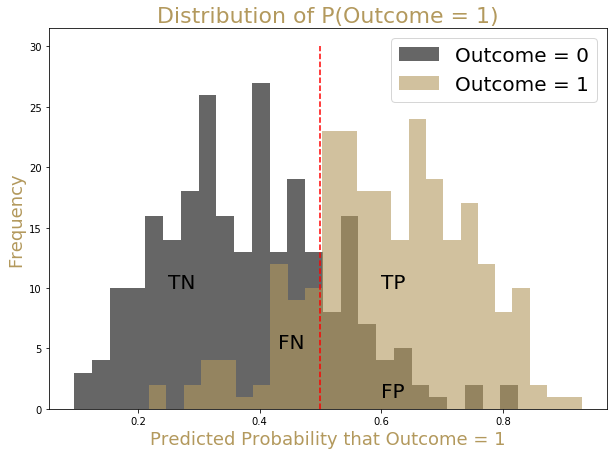

In [52]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'black',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = '#b3995d',
         alpha = 0.6,
         label = 'Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 30,
           color = 'r',
           linestyle = '--')

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.25, 10),
             s = 'TN',
             size = 20)

plt.annotate(xy = (0.43, 5),
             s = 'FN',
             size = 20)

plt.annotate(xy = (0.60, 10),
             s = 'TP',
             size = 20)

plt.annotate(xy = (0.6, 1),
             s = 'FP',
             size = 20)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22, color='#b3995d')
plt.ylabel('Frequency', fontsize = 18, color='#b3995d')
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18, color='#b3995d')
plt.rc_context({'axes.edgecolor':'#b3995d', 'xtick.color':'#b3995d', 'ytick.color':'#b3995d', 'figure.facecolor':'white'})

# Create legend.
plt.legend(fontsize = 20);

In [53]:
pipe.score(X_train,y_train)

0.9082998661311914

In [54]:
pipe.score(X_test,y_test)

0.779559118236473

In [55]:
grid_param = {
    'tfidf__ngram_range' : [(1,1),(1,2),(1,3)],
    'tfidf__max_features': [500,None],
    'tfidf__min_df'      : [2, 3],
    'tfidf__max_df'      : [.95,.05],
    'tfidf__stop_words'  : [stop_words,None],
    'tfidf__use_idf'     : [True, False],
    'tfidf__norm'        : ['l1','l2',None],
    'logreg__penalty'    : ['l1','l2'],
    'logreg__C'          : [0.5]
}

grid = GridSearchCV(pipe,
                    grid_param,
                    n_jobs = -1, # -1 means using all processors
                    verbose = 2,
                    cv = 5)

In [56]:
grid.fit(X_train,y_train);

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  6.7min finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
pipe.score(X_train,y_train)

0.9082998661311914

In [58]:
pipe.score(X_test,y_test)

0.779559118236473

In [59]:
grid.best_params_

{'logreg__C': 0.5,
 'logreg__penalty': 'l2',
 'tfidf__max_df': 0.95,
 'tfidf__max_features': None,
 'tfidf__min_df': 3,
 'tfidf__ngram_range': (1, 2),
 'tfidf__norm': 'l2',
 'tfidf__stop_words': None,
 'tfidf__use_idf': True}

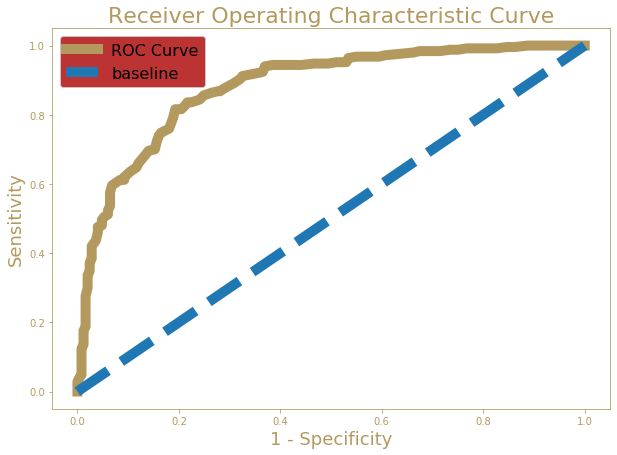

In [60]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve',color='#b3995d', linewidth=10)

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--',
         linewidth=10)

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22, color='#b3995d')
plt.ylabel('Sensitivity', fontsize=18, color='#b3995d')
plt.xlabel('1 - Specificity', fontsize=18, color='#b3995d')
plt.rc_context({'axes.edgecolor':'#b3995d', 'xtick.color':'#b3995d', 'ytick.color':'#b3995d', 'figure.facecolor':'#aa0000'})
plt.rcParams['axes.facecolor'] = '#aa0000'


# Create legend.
plt.legend(fontsize=16);

# Models to use:

KNN 
- Pros: simple,intuitive; 
- Cons: but can't do statistical inference

Logistic Regression 
- Pros: gives probabilities, coefficients ->inference, hypothesis testing; 
- Cons: but assumptions, features arent linearly related

Naive Bayes 
- Pros: extract inference, understand features;
- Cons: but not easy to implement/confusing

Decision Tree  
- Pros: simple,intuitive, non-parametric, tunable, fast to fit, can pass catagorical data, robust to outliers;
- Cons: non-parametric, data imbalance, prone to overfitting

Bagging Classifier
- Pros: averaging, relies on CLT, wisdom of the crowd
- Cons: can be high variance, dumb crowd

In [61]:
data.to_csv('./datasets/final.csv',index = False)

In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.8808112449799197